In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

C:\Users\kulka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [9]:

# Define data transformations for data augmentation and normalization
data_transforms = {
    'train': transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

In [10]:
# Define the data directory
# data_dir = '../../Anchor_images/'
data_dir = '../test/'

# Create data loaders
image_datasets = {x: datasets.ImageFolder(data_dir, data_transforms[x]) for x in ['test']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers=4) for x in ['test']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['test']}
print(dataset_sizes)

class_names = image_datasets['test'].classes
print(class_names)
print(len(class_names))

{'test': 2243}
['attack', 'benign']
2


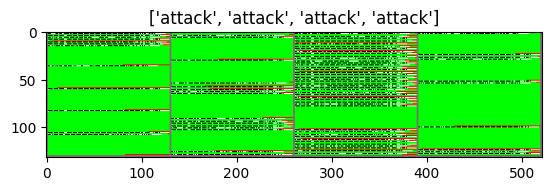

In [13]:
# show a image
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated
images, classes = next(iter(dataloaders['test']))
import torchvision
out = torchvision.utils.make_grid(images)
imshow(out, title=[class_names[x] for x in classes])

In [ ]:
print

In [17]:
# Load the pre-trained ResNet-18 model
model = models.resnet18(pretrained=True)
# Modify the final layer to match the number of classes
num_classes = len(class_names)
model.fc = nn.Linear(model.fc.in_features, num_classes)


# Move the model to the GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [18]:
model.load_state_dict(torch.load('custom_cnn_model_atleast_1_0_75.pth'))

# Test the model on the test dataset
test_loader = dataloaders['test']
all_preds = []
all_labels = []

for inputs, labels in test_loader:
    inputs = inputs.to(device)
    labels = labels.to(device)
    with torch.no_grad():
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
    all_preds.extend(preds.cpu().numpy())
    all_labels.extend(labels.cpu().numpy())

# Convert lists to numpy arrays
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

# Calculate accuracy
test_accuracy = np.sum(all_preds == all_labels) / len(all_labels)
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Accuracy: 0.9117


In [19]:
print(all_preds.shape)

(2243,)
